In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#diabetes labelled dataset from kaggle
df = pd.read_csv("Diabetes_Mean.csv")
df.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72.000000,35.00000,0,33.600000,0.627,50,1
1,1,1,85,66.000000,29.00000,0,26.600000,0.351,31,0
2,2,8,183,64.000000,29.15342,0,23.300000,0.672,32,1
3,3,1,89,66.000000,23.00000,94,28.100000,0.167,21,0
4,4,0,137,40.000000,35.00000,168,43.100000,2.288,33,1
5,5,5,116,74.000000,29.15342,0,25.600000,0.201,30,0
6,6,3,78,50.000000,32.00000,88,31.000000,0.248,26,1
7,7,10,115,72.405184,29.15342,0,35.300000,0.134,29,0
8,8,2,197,70.000000,45.00000,543,30.500000,0.158,53,1
9,9,8,125,96.000000,29.15342,0,32.457464,0.232,54,1


In [3]:
df.shape

(768, 10)

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
#only use while using c4.5 to have unique value patient id 
df = df.rename(columns={'Unnamed: 0': 'id'})
X = df[['id','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [4]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# DT using ID3

In [7]:
#by mentioning criterion=entropy, we use ID3 DT
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       160
           1       0.55      0.73      0.63        71

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.77      0.74      0.74       231

[[118  42]
 [ 19  52]]


In [12]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_1 <= 154.50
|   |--- feature_5 <= 26.35
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_0 <= 4.50
|   |   |   |   |--- feature_6 <= 0.27
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.27
|   |   |   |   |   |--- feature_5 <= 22.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  22.50
|   |   |   |   |   |   |--- feature_5 <= 23.45
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  23.45
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  4.50
|   |   |   |   |--- class: 0
|   |--- feature_5 >  26.35
|   |   |--- feature_7 <= 28.50
|   |   |   |--- feature_3 <= 29.08
|   |   |   |   |--- feature_7 <= 23.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--

<IPython.core.display.Javascript object>


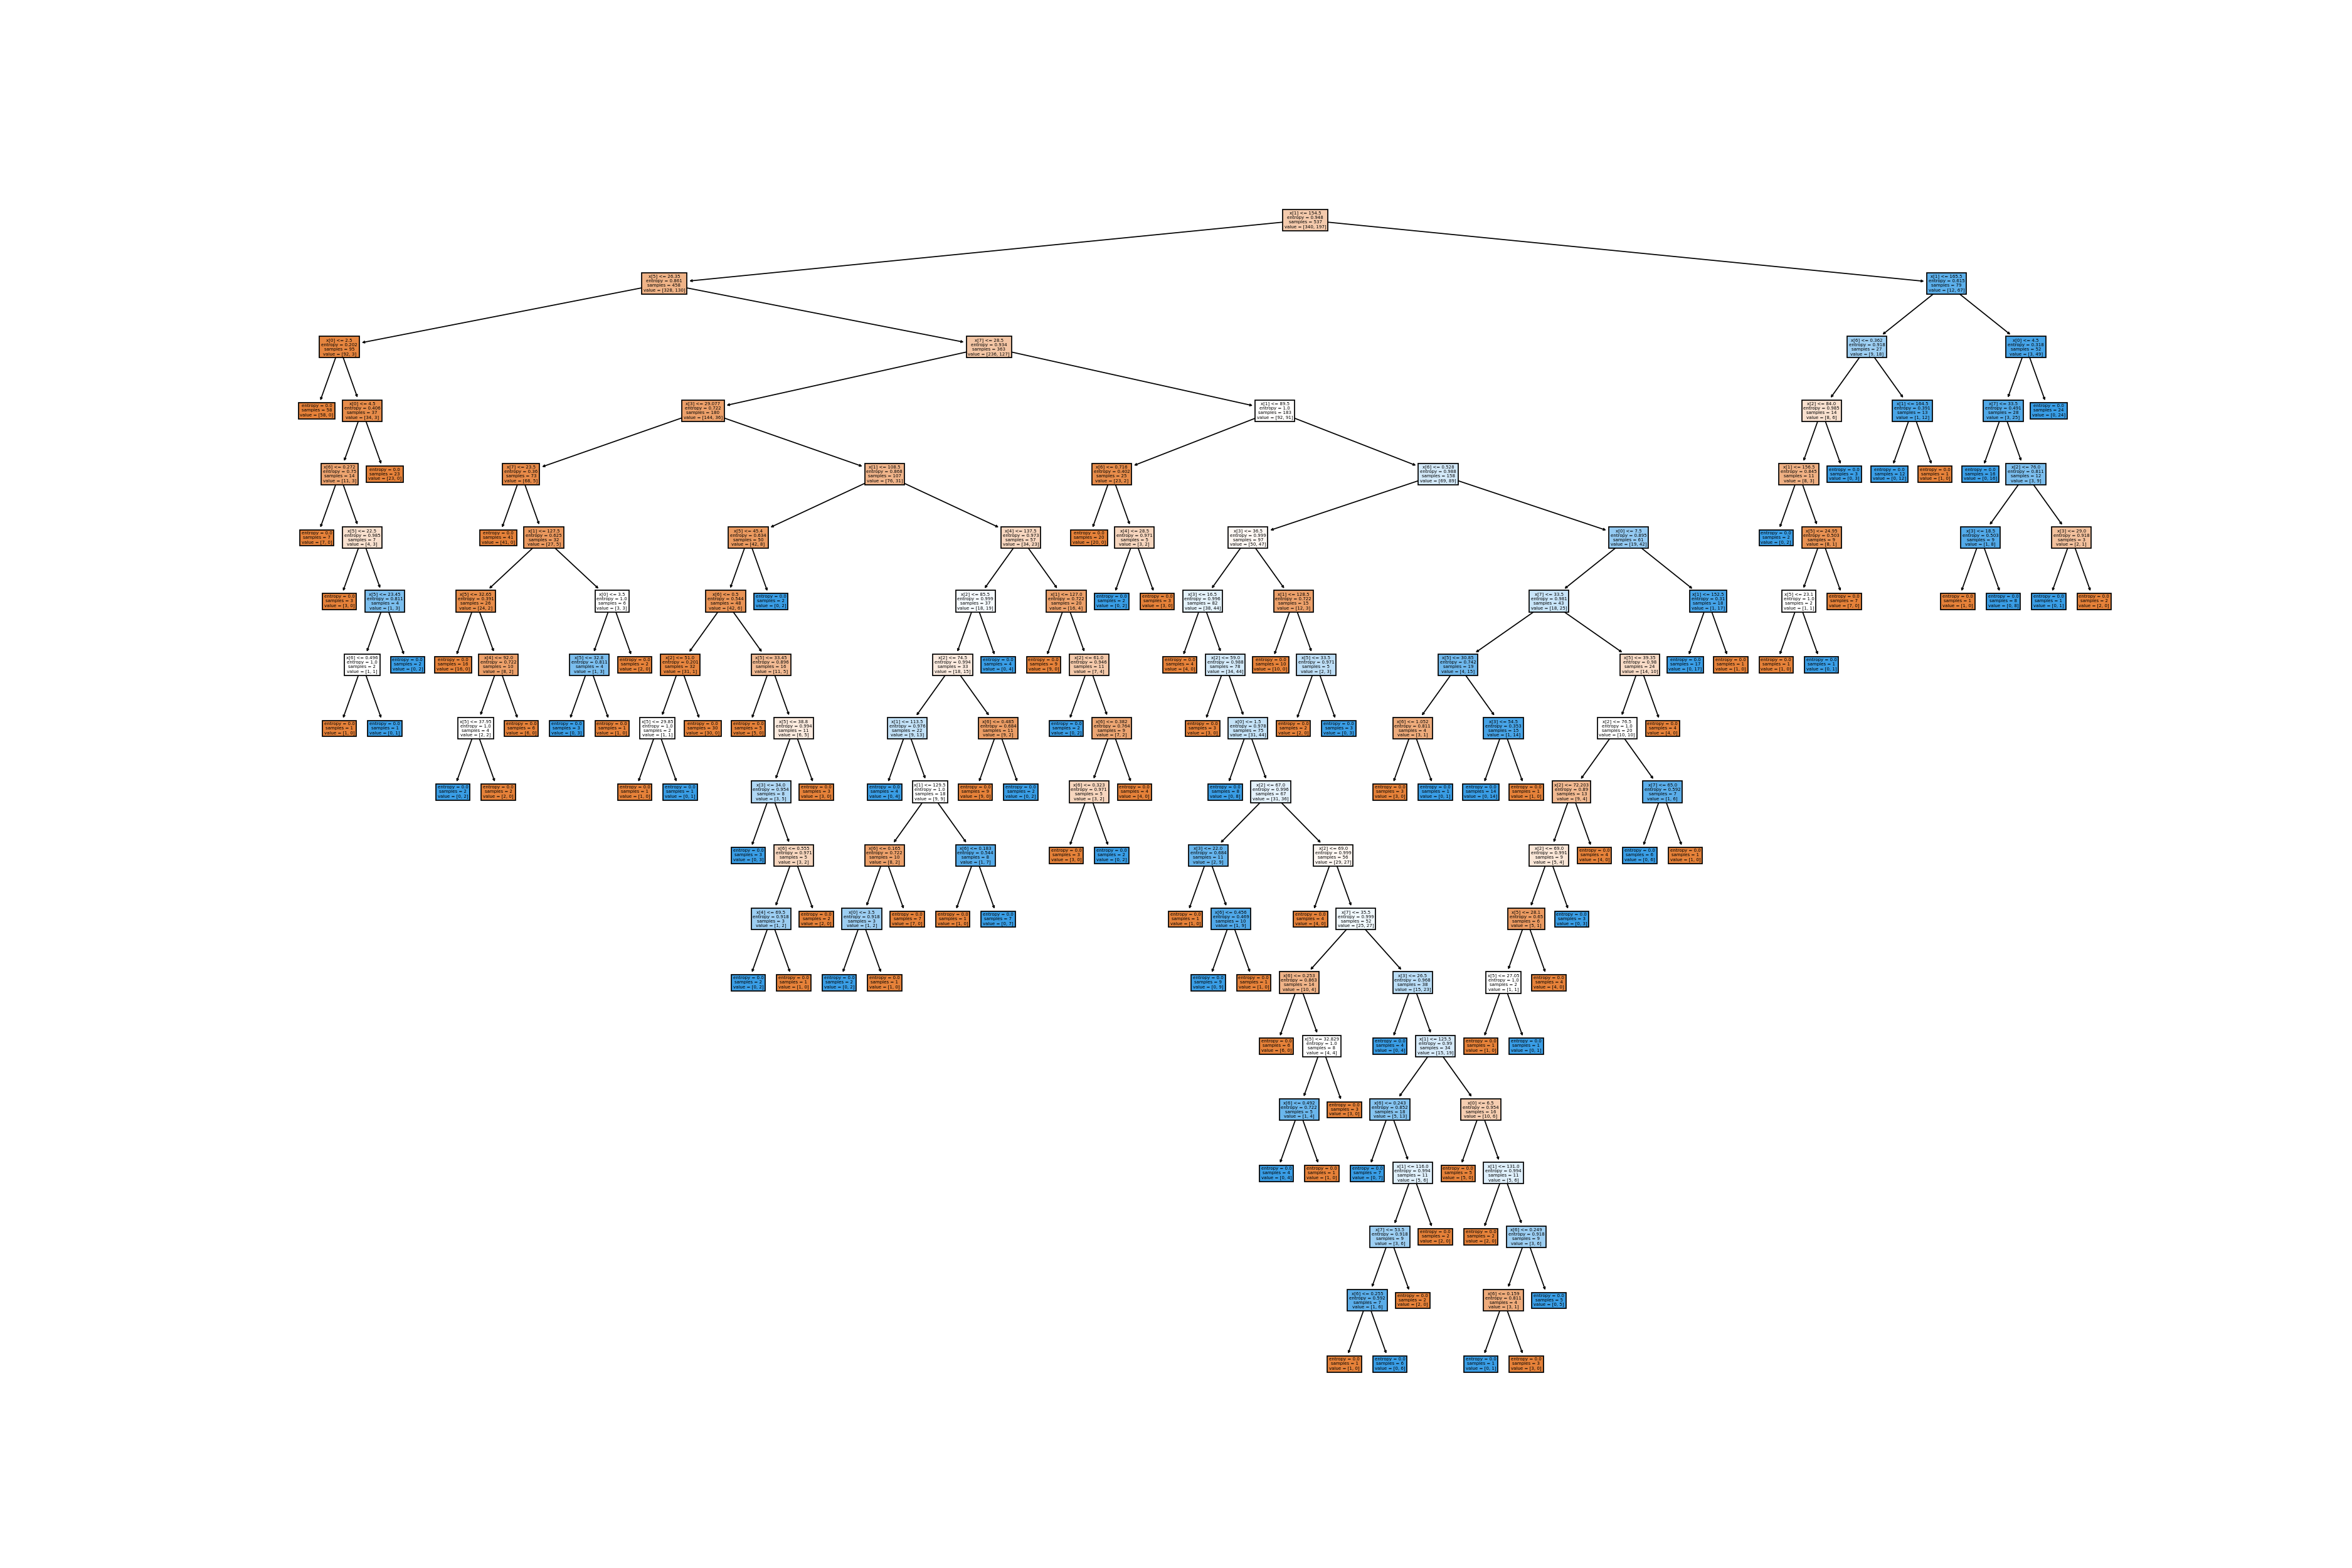

In [13]:
fig = plt.figure(figsize=(30,20))
graph = tree.plot_tree(dtree, filled=True)

## Different analysis 

In [21]:
import time
start_time = time.time()
dtree_gini = DecisionTreeClassifier(criterion="gini")
dtree_gini.fit(X_train, y_train)
gini_training_time = time.time() - start_time
print("Gini time: ",gini_training_time)


Gini time:  0.016429901123046875


In [25]:
# Train the decision tree with Entropy criterion
start_time = time.time()
dtree_entropy = DecisionTreeClassifier(criterion="entropy")
dtree_entropy.fit(X_train, y_train)
entropy_training_time = time.time() - start_time
print("Entropy time: ",entropy_training_time)

Entropy time:  0.01984858512878418


In [26]:
predictions_gini = dtree_gini.predict(X_test)
print("Confusion Matrix for Gini:")
print(confusion_matrix(y_test, predictions_gini))

predictions_entropy = dtree_entropy.predict(X_test)
print("Confusion Matrix for Entropy:")
print(confusion_matrix(y_test, predictions_entropy))

Confusion Matrix for Gini:
[[119  41]
 [ 27  44]]
Confusion Matrix for Entropy:
[[121  39]
 [ 20  51]]


<IPython.core.display.Javascript object>


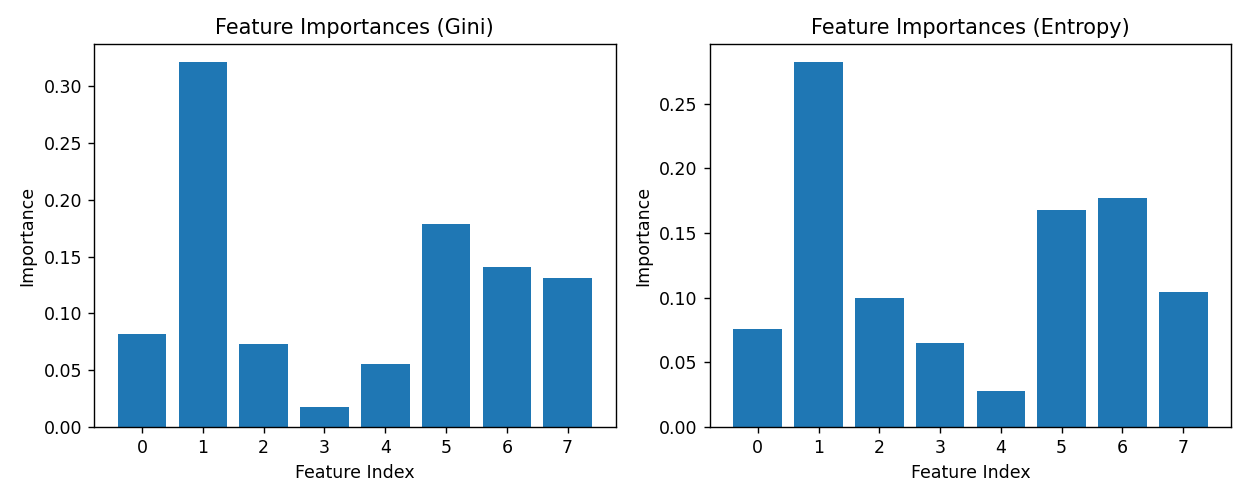

In [27]:
# Get feature importances for Gini and Entropy trees
gini_feature_importance = dtree_gini.feature_importances_
entropy_feature_importance = dtree_entropy.feature_importances_

# Create bar plots for feature importances
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(len(gini_feature_importance)), gini_feature_importance)
plt.title("Feature Importances (Gini)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")

plt.subplot(1, 2, 2)
plt.bar(range(len(entropy_feature_importance)), entropy_feature_importance)
plt.title("Feature Importances (Entropy)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")

plt.tight_layout()
plt.show()


Owing to accuracy of 'entropy' based DT we can further analyse the results using different model evaluation

In [30]:
from sklearn.model_selection import cross_val_score
dtree_kfold = DecisionTreeClassifier(criterion="entropy")
scores = cross_val_score(dtree_kfold, X_train, y_train, cv=5)
print(scores)
print("Mean score",scores.mean())

[0.75925926 0.66666667 0.69158879 0.64485981 0.72897196]
Mean score 0.6982692973347179


In [32]:
from sklearn.model_selection import StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dtree_entropy = DecisionTreeClassifier(criterion="entropy")
scores = cross_val_score(dtree_entropy, X_train, y_train, cv=stratified_kfold)
print(scores)
print("Mean score",scores.mean())

[0.67592593 0.61111111 0.71962617 0.78504673 0.70093458]
Mean score 0.6985289027345103


# DT using CART

In [7]:
#by default decissiontreeclassifier uses CART
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
predictions = dtree.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80       160
           1       0.57      0.72      0.63        71

    accuracy                           0.74       231
   macro avg       0.71      0.74      0.72       231
weighted avg       0.77      0.74      0.75       231

[[121  39]
 [ 20  51]]


In [10]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_1 <= 154.50
|   |--- feature_5 <= 26.35
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_0 <= 4.50
|   |   |   |   |--- feature_6 <= 0.27
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.27
|   |   |   |   |   |--- feature_5 <= 22.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  22.50
|   |   |   |   |   |   |--- feature_2 <= 63.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  63.00
|   |   |   |   |   |   |   |--- feature_6 <= 0.30
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6 >  0.30
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  4.50
|   |   |   |   |--- class: 0
|   |--- feature_5 >  26.35
|   |   |--- feature_7 <= 28.50
|   |   |   |--- feature_3 <= 29.08
|   |   |   |   |--- feature_7 <= 23.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--

<IPython.core.display.Javascript object>


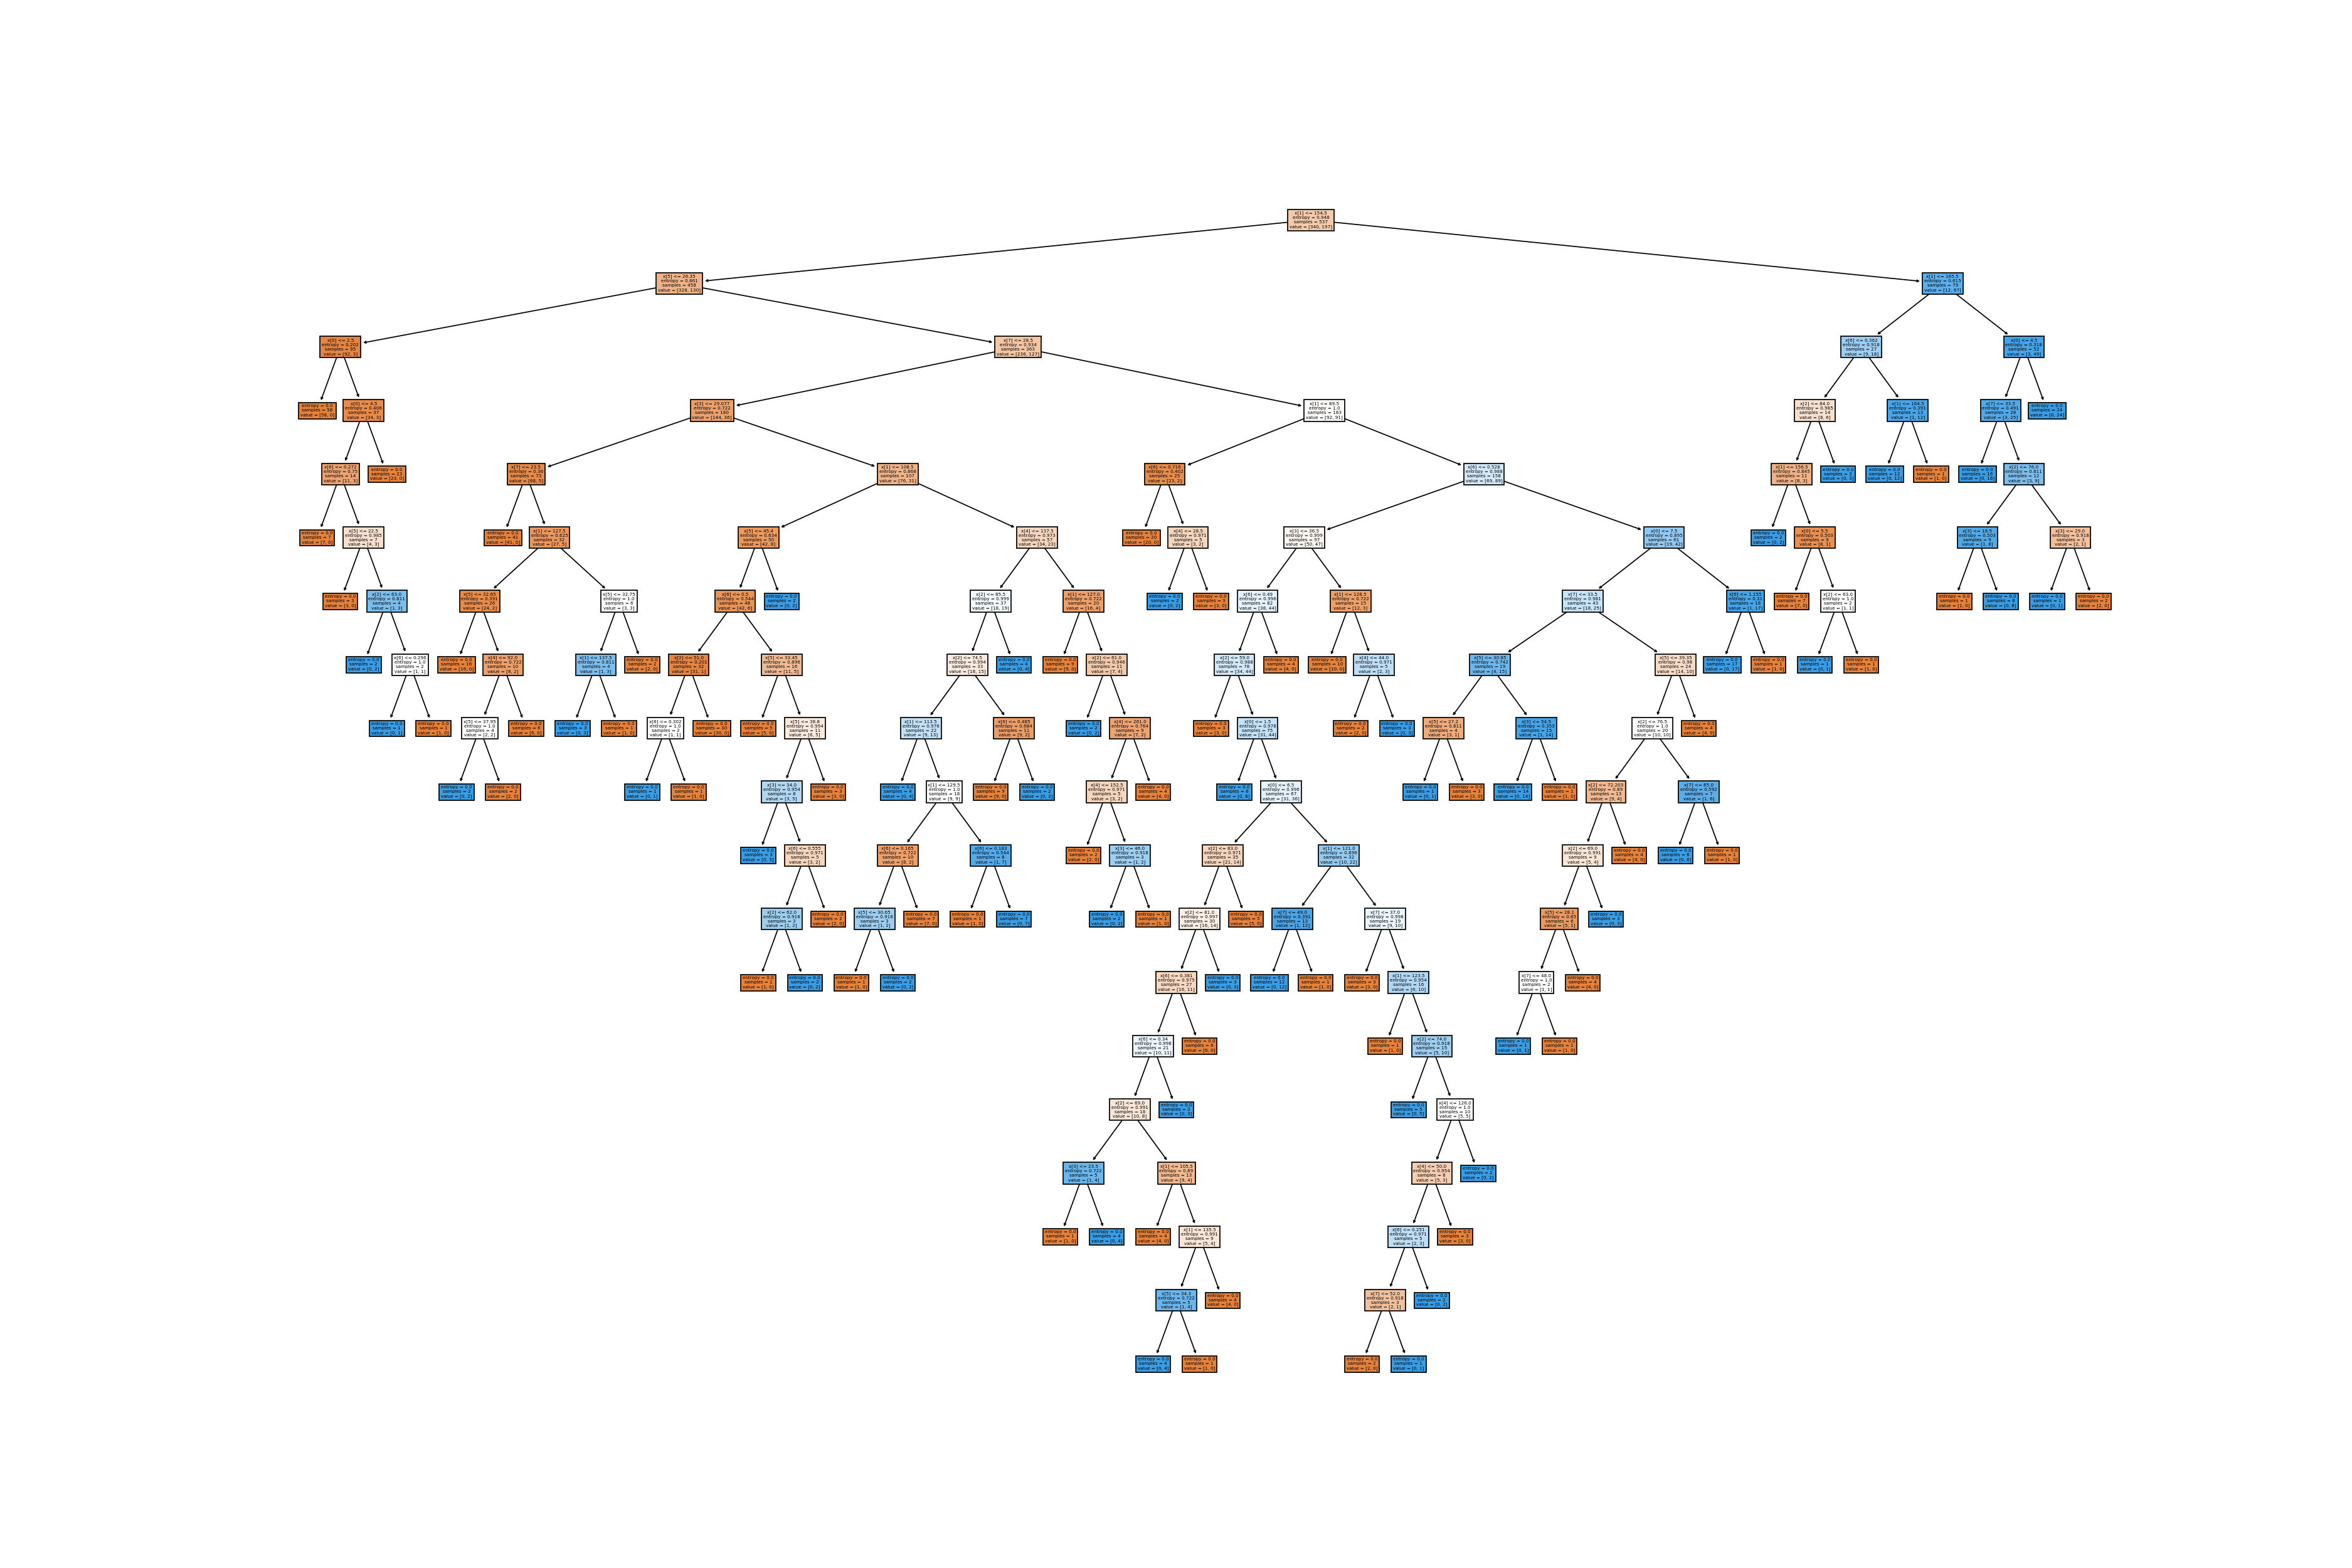

In [11]:
fig = plt.figure(figsize=(30,20))
graph = tree.plot_tree(dtree, filled=True)

# DT using C4.5

In [6]:
from C4point5 import C45

In [7]:
X_train['Outcome'] = y_train
X_train.to_csv('train.csv', index=False)

In [8]:
X_test['Outcome'] = y_test
X_test.to_csv('test.csv', index=False)

In [9]:
model = C45.C4point5("train.csv")

In [10]:
model.readDataset()

In [11]:
model.preprocessData()
model.generateTree()
model.printTree()

Glucose <= 165.5 : 
    Insulin <= 487.5 : 
        Pregnancies <= 13.5 : 
            DiabetesPedigreeFunction <= 2.0345 : 
                BMI <= 62.199999999999996 : 
                    id <= 0.5 : 1
                    id > 0.5 : 
                        BMI <= 48.099999999999994 : 
                            BMI <= 22.75 : 0
                            BMI > 22.75 : 
                                BMI <= 22.95 : 1
                                BMI > 22.95 : 
                                    SkinThickness <= 7.5 : 1
                                    SkinThickness > 7.5 : 
                                        BloodPressure <= 111.0 : 
                                            BMI <= 23.75 : 0
                                            BMI > 23.75 : 
                                                BMI <= 23.85 : 1
                                                BMI > 23.85 : 
                                                    BMI <= 24.25 : 0
                        

In [14]:
pred = model.predict()
#input: 111,8,155,62.0,26.0,495,34.0,0.543,46
#outpu: 1(truth)

Enter value for id['continuous']111
Enter value for Pregnancies['continuous']8
Enter value for Glucose['continuous']155
Enter value for BloodPressure['continuous']62
Enter value for SkinThickness['continuous']26
Enter value for Insulin['continuous']495
Enter value for BMI['continuous']34
Enter value for DiabetesPedigreeFunction['continuous']0.543
Enter value for Age['continuous']46
prediction : 1
